#Airbnb Hotel Booking Analysis

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv',low_memory=False)

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83598 entries, 0 to 83597
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83598 non-null  int64  
 1   NAME                            83378 non-null  object 
 2   host id                         83598 non-null  int64  
 3   host_identity_verified          83354 non-null  object 
 4   host name                       83244 non-null  object 
 5   neighbourhood group             83569 non-null  object 
 6   neighbourhood                   83582 non-null  object 
 7   lat                             83590 non-null  float64
 8   long                            83590 non-null  float64
 9   country                         83239 non-null  object 
 10  country code                    83503 non-null  object 
 11  instant_bookable                83503 non-null  object 
 12  cancellation_policy             

In [8]:
df.duplicated().value_counts()

,count
False,83598


In [9]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [10]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop 'house_rules' and 'license' columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True)

# Remove all dollar signs in the 'price' and 'service fee' columns
df['price'] = df['price'].str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].str.replace('$', '', regex=False)

# Remove all commas in the 'price' and 'service fee' columns
df['price'] = df['price'].str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].str.replace(',', '', regex=False)

# Rename the 'price' and 'service fee' columns to include a dollar sign
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Drop all records with missing values
df.dropna(inplace=True)

# Change mismatched data types to the appropriate ones
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Correct the spelling of 'brookin' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookin', 'neighbourhood group'] = 'Brooklyn'

# Get rid of outliers in the 'availability 365' column data
df.drop(df[df['availability 365'] > 500].index, inplace=True)


In [11]:
df.duplicated().value_counts()

,count
False,68315


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68315 entries, 0 to 83596
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              68315 non-null  object        
 1   NAME                            68315 non-null  object        
 2   host id                         68315 non-null  object        
 3   host_identity_verified          68315 non-null  object        
 4   host name                       68315 non-null  object        
 5   neighbourhood group             68315 non-null  object        
 6   neighbourhood                   68315 non-null  object        
 7   lat                             68315 non-null  float64       
 8   long                            68315 non-null  float64       
 9   country                         68315 non-null  object        
 10  country code                    68315 non-null  object        
 11  instant

# Exploratory Data Analysis (EDA)


###Summary Statistics


In [13]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,68315.000000,68315.000000,68315.000000,68315.000000,68315.000000,68315.000000,68315.000000,68315,68315.000000,68315.000000,68315.000000,68315.000000
mean,40.727357,-73.948333,2012.494079,625.583547,125.117749,7.732709,33.172612,2019-07-26 09:33:44.673936896,1.384447,3.293742,7.711118,146.360682
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687540,-73.982250,2008.000000,339.000000,68.000000,2.000000,3.000000,2018-12-08 00:00:00,0.220000,2.000000,1.000000,10.000000
50%,40.721350,-73.953730,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-18 00:00:00,0.760000,3.000000,1.000000,113.000000
75%,40.762550,-73.930590,2018.000000,913.000000,183.000000,5.000000,39.000000,2020-07-24 00:00:00,2.010000,4.000000,3.000000,272.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056278,0.050711,5.761651,332.002327,66.404672,30.146751,54.209711,NaN,1.778423,1.275411,32.024400,133.607264


###What are the different property types in the dataset?



In [17]:
# Check unique room types and their counts
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,36709
Private room,30171
Shared room,1327
Hotel room,108


Text(0.5, 1.0, 'Property Types and their Count in the Dataset')

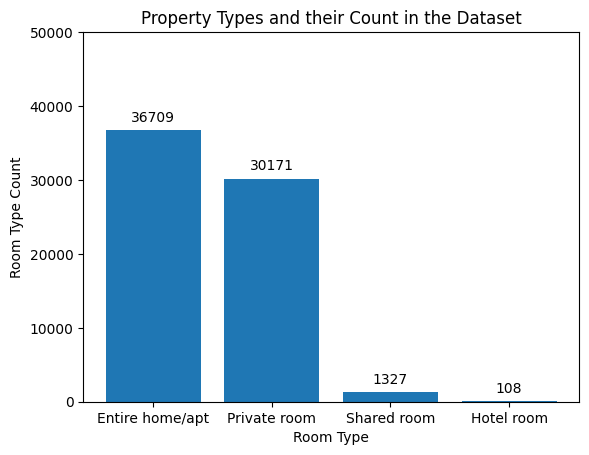

In [20]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,'count']);
plt.bar_label(room_type_bar, labels=property_types.loc[:,'count'], padding=4);
plt.ylim([0, 50000]);
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their Count in the Dataset')

###Which neighbourhood group has the highest number of listings?

In [21]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,28318
Brooklyn,28260
Queens,9176
Bronx,1896
Staten Island,664
brookln,1


###Which neighbourhood group has the largest number of listings?

Text(0.5, 1.0, 'Which Neighborhood Group has the Highest Number of Listings')

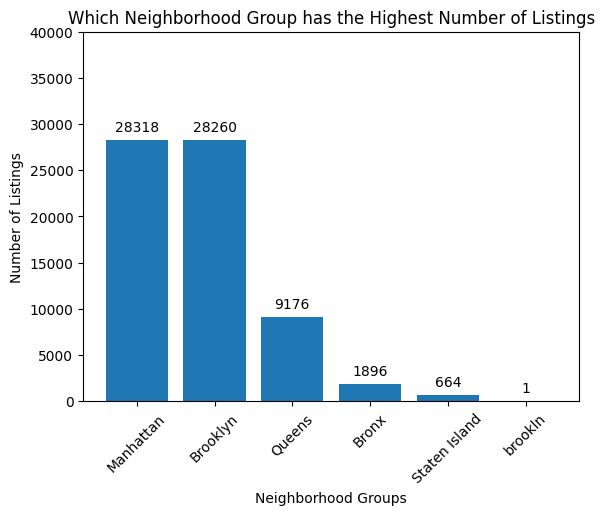

In [22]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count'])
plt.bar_label(hood_group_bar, labels=hood_group.loc[:,'count'], padding=4)
plt.ylim([0,40000])
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.title('Which Neighborhood Group has the Highest Number of Listings')

###Which neighbourhood groups have the highest average prices for Airbnb listings?

Text(0.5, 1.0, 'Average Price per Listings ($) in each Neighborhood Group')

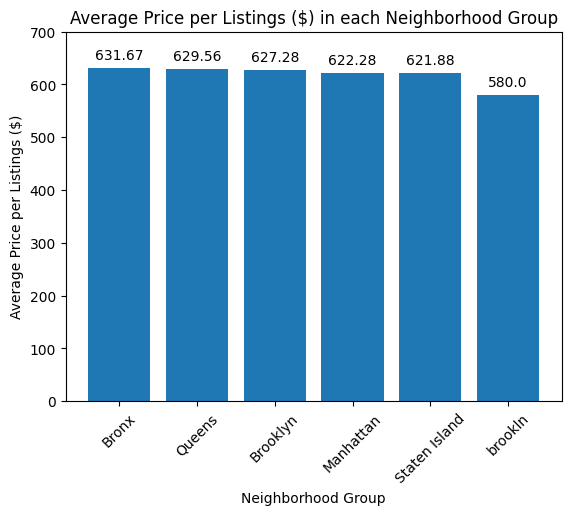

In [27]:
avg_price = df.groupby("neighbourhood group")['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$'])
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, "price_$"], 2), label_type='edge', padding=4)
plt.ylim([0,700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listings ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listings ($) in each Neighborhood Group')

In [26]:
# Show all column names
print(df.columns.tolist())


['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price_$', 'service_fee_$', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


###Is there a relationship between the construccion year of property and price?

Text(0.5, 1.0, 'Average Price ($) for Properties in each Construction Year')

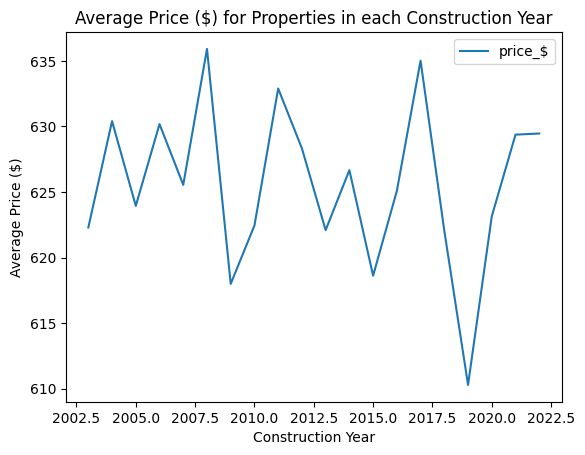

In [28]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')

### Who are the top 10 hosts by calculated host listing count?

Text(0.5, 1.0, 'Top 10 Hosts by Calculated Host Listings Count')

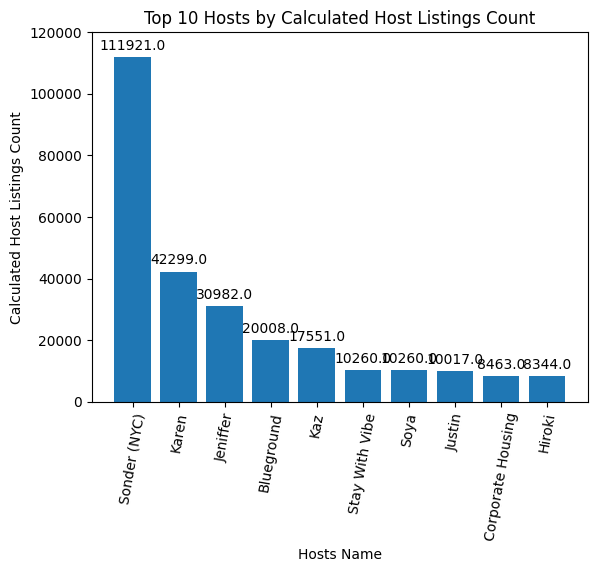

In [30]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, labels=hosts.loc[:, 'calculated host listings count'], label_type='edge', padding=3)
plt.xlabel('Hosts Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')

###Are hosts with verified identities more likely to receive positive reviews?

In [31]:
review = df.groupby("host_identity_verified")['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.295475
unconfirmed,3.292011


Text(0.5, 1.0, 'Average Review Rate for each verification status')

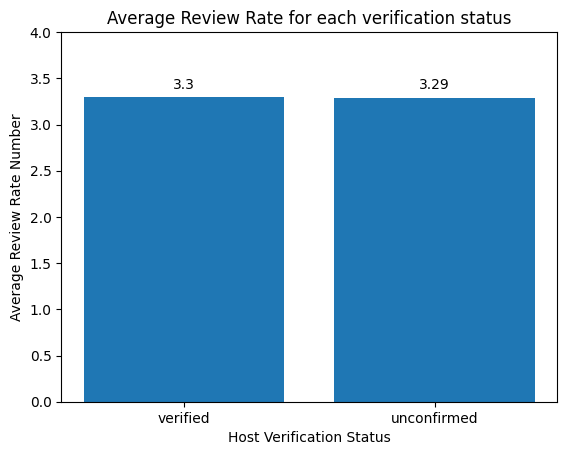

In [33]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"])
plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"],2), padding=4)
plt.ylim([0, 4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for each verification status')

Text(0.5, 1.0, 'Average Review Rate for each Verification Status')

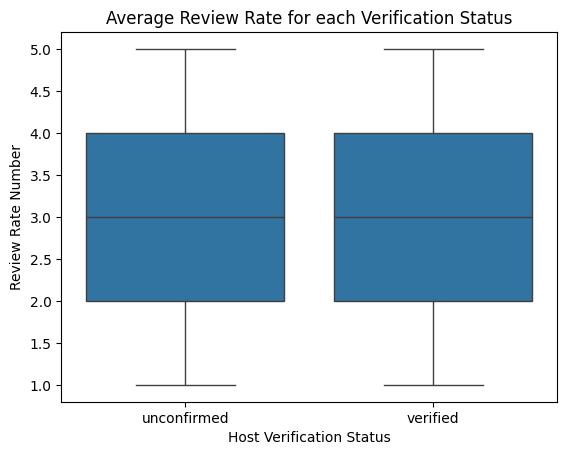

In [34]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Status')

###Is there a correlation between the price of a listing and its service fee?

In [35]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909335174058)

Text(0.5, 1.0, 'A Regression Plot showing the correlation of the Price of a Listing and its Service Fee')

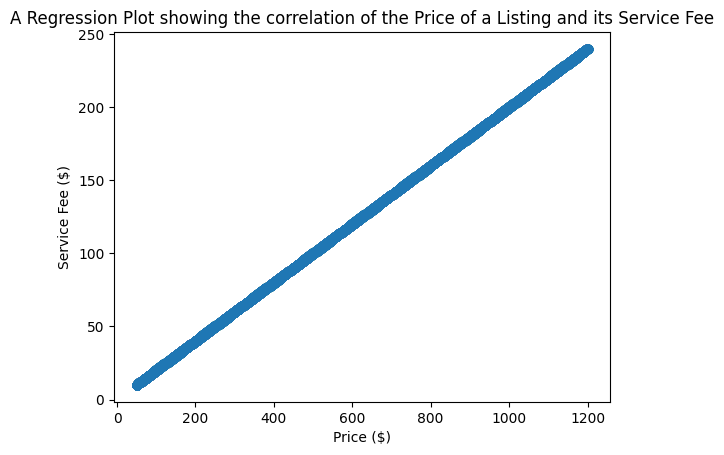

In [36]:
sns.regplot(data=df, x='price_$', y='service_fee_$')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot showing the correlation of the Price of a Listing and its Service Fee')

### What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [37]:
ARRN = df.groupby(["neighbourhood group", "room type"])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.417004
                    Private room               3.351476
                    Shared room                3.352113
Brooklyn            Entire home/apt            3.253575
                    Hotel room                 3.833333
                    Private room               3.296245
                    Shared room                3.331224
Manhattan           Entire home/apt            3.280224
                    Hotel room                 3.500000
                    Private room               3.298503
                    Shared room                3.282051
Queens              Entire home/apt            3.365775
                    Hotel room                 3.750000
                    Private room               3.330383
                    Shared room                3.294372
Staten Island       Entire home/apt            3.346705
                    Private room               3.503226
                    Shared room                3.600000
brookln             Private room               4.000000

Text(0.5, 1.0, 'Average Review Rate for each Room/Property Type in each Neighbourhood Group')

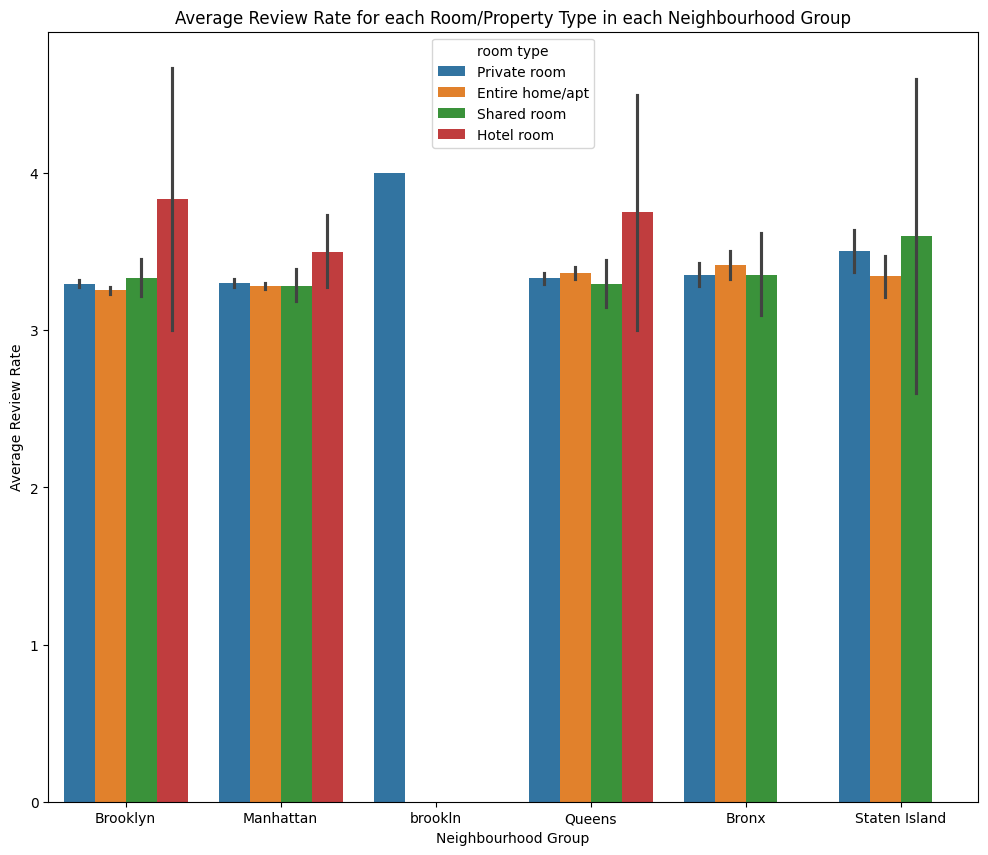

In [39]:
plt.figure(figsize=[12,10])
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group')

###Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

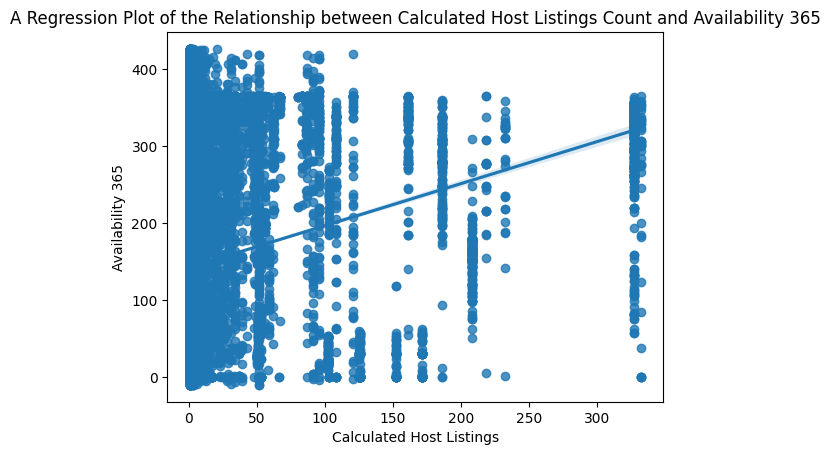

In [44]:
sns.regplot(df, x= 'calculated host listings count', y= 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title("A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365");

In [46]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1307472422319525)